# MLP for Binary Classification:
` Multi-Layer Percepron`
- `instructor: Mr.Salar H.Shamchi`

<img src="../simple MLP_03/pictures/classification_problem.jpg"
     style="float: center; width:500px;height:400;"/>
<caption><center> <u><b> Figure 1 </u></b>: Binary Classificatin <br> </center></caption><br>

- <b>There're are two classes in this problem:</b>
- if  [a, b, a*b]  => class 0
- if  [a*b, a, b] => calss 1

In [1]:
# basic libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# tensorflow:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

# sklearn:
from sklearn.model_selection import train_test_split

In [2]:
# creating our data:

X_inp = []
y_out = []


for a in range(1, 10):
    for b in range(1, 10):
        X_inp.append([a, b, a*b])
        y_out.append(0)
        
        X_inp.append([a*b, a, b])
        y_out.append(1)

X_inp = np.array(X_inp)
y_out = np.array(y_out)


# printing shape of input / output:
print("X_inp shape: ", X_inp.shape)
print("y_out shape: ", y_out.shape)

X_inp shape:  (162, 3)
y_out shape:  (162,)


In [3]:
# one hot encoding:
y_out_cat = to_categorical(y_out)
print("after one hot encoding: ")
print("y_out_cat: ", y_out_cat.shape)

after one hot encoding: 
y_out_cat:  (162, 2)


In [4]:
# train / test split:
X_train, X_test, y_train, y_test = train_test_split(X_inp,
                                                    y_out_cat,
                                                    test_size=0.1,
                                                    random_state=42)
# printing shape of result:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (145, 3)
X_test shape:  (17, 3)
y_train shape:  (145, 2)
y_test shape:  (17, 2)


In [5]:
# creating our model:
# using functional API (not Sequential)

# input layer:
input_layer = Input(shape=(3,))                                  

# hidden_layer_1:
hidden_layer_1 = Dense(units=4,
                       activation="sigmoid",                   
                       use_bias=True)(input_layer)
# output_layer:
output_layer = Dense(units=2,
                  activation="sigmoid")(hidden_layer_1)         

# creating model:
mlp_model = Model(inputs=input_layer,
                  outputs=output_layer)

# summary of the model:
mlp_model.summary()

# compiling the model:
mlp_model.compile(optimizer=SGD(learning_rate=0.01),
                  loss="mse",
                  metrics="accuracy")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [6]:
# training of the model:
result_of_training = mlp_model.fit(x=X_train,
                                   y=y_train,
                                   validation_split=0.1,
                                   batch_size=128,
                                   epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 255ms/step - loss: 0.3202 - accuracy: 0.4154 - val_loss: 0.3157 - val_accuracy: 0.4667
Epoch 2/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.3197 - accuracy: 0.4154 - val_loss: 0.3148 - val_accuracy: 0.4667
Epoch 3/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.3190 - accuracy: 0.4154 - val_loss: 0.3141 - val_accuracy: 0.4667
Epoch 4/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.3183 - accuracy: 0.4231 - val_loss: 0.3128 - val_accuracy: 0.4667
Epoch 5/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.3171 - accuracy: 0.4385 - val_loss: 0.3119 - val_accuracy: 0.4667
Epoch 6/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.3163 - accuracy: 0.4385 - val_loss: 0.3113 - val_accuracy: 0.4667
Epoch 7/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.3157 - accuracy: 0.4308 - val_loss: 0.3099 - val_accuracy: 0.4667
Epoch 8/1000

Epoch 59/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.2913 - accuracy: 0.5077 - val_loss: 0.2918 - val_accuracy: 0.4667
Epoch 60/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2910 - accuracy: 0.5077 - val_loss: 0.2918 - val_accuracy: 0.4667
Epoch 61/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.2907 - accuracy: 0.5077 - val_loss: 0.2916 - val_accuracy: 0.4667
Epoch 62/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.2903 - accuracy: 0.5077 - val_loss: 0.2915 - val_accuracy: 0.4667
Epoch 63/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.2901 - accuracy: 0.5154 - val_loss: 0.2909 - val_accuracy: 0.4667
Epoch 64/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2897 - accuracy: 0.5077 - val_loss: 0.2907 - val_accuracy: 0.4667
Epoch 65/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.2895 - accuracy: 0.5077 - val_loss: 0.2901 - val_accuracy: 0.4667
Epoch 

2/2 [==============================] - 0s 44ms/step - loss: 0.2751 - accuracy: 0.5231 - val_loss: 0.2770 - val_accuracy: 0.4667
Epoch 117/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.2746 - accuracy: 0.5308 - val_loss: 0.2770 - val_accuracy: 0.4667
Epoch 118/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.2745 - accuracy: 0.5308 - val_loss: 0.2768 - val_accuracy: 0.4667
Epoch 119/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.2742 - accuracy: 0.5308 - val_loss: 0.2769 - val_accuracy: 0.4667
Epoch 120/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.2741 - accuracy: 0.5308 - val_loss: 0.2769 - val_accuracy: 0.4667
Epoch 121/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2739 - accuracy: 0.5308 - val_loss: 0.2766 - val_accuracy: 0.4667
Epoch 122/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2736 - accuracy: 0.5308 - val_loss: 0.2764 - val_accuracy: 0.4667
Epoch 123/1000

2/2 [==============================] - 0s 34ms/step - loss: 0.2600 - accuracy: 0.5692 - val_loss: 0.2628 - val_accuracy: 0.5333
Epoch 174/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.2594 - accuracy: 0.5769 - val_loss: 0.2618 - val_accuracy: 0.5333
Epoch 175/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2589 - accuracy: 0.5769 - val_loss: 0.2615 - val_accuracy: 0.5333
Epoch 176/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.2587 - accuracy: 0.5769 - val_loss: 0.2615 - val_accuracy: 0.5333
Epoch 177/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2585 - accuracy: 0.5769 - val_loss: 0.2604 - val_accuracy: 0.5333
Epoch 178/1000
2/2 [==============================] - 0s 203ms/step - loss: 0.2579 - accuracy: 0.5846 - val_loss: 0.2598 - val_accuracy: 0.5333
Epoch 179/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.2576 - accuracy: 0.5846 - val_loss: 0.2587 - val_accuracy: 0.5333
Epoch 180/100

2/2 [==============================] - 0s 39ms/step - loss: 0.2285 - accuracy: 0.8000 - val_loss: 0.2220 - val_accuracy: 0.8000
Epoch 231/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.2282 - accuracy: 0.8077 - val_loss: 0.2217 - val_accuracy: 0.8000
Epoch 232/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2280 - accuracy: 0.8077 - val_loss: 0.2211 - val_accuracy: 0.8000
Epoch 233/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.2276 - accuracy: 0.8154 - val_loss: 0.2208 - val_accuracy: 0.8000
Epoch 234/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2274 - accuracy: 0.8154 - val_loss: 0.2198 - val_accuracy: 0.8000
Epoch 235/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2270 - accuracy: 0.8077 - val_loss: 0.2197 - val_accuracy: 0.8000
Epoch 236/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.2268 - accuracy: 0.8077 - val_loss: 0.2190 - val_accuracy: 0.8000
Epoch 237/1000

2/2 [==============================] - 0s 35ms/step - loss: 0.2180 - accuracy: 0.8462 - val_loss: 0.2086 - val_accuracy: 0.8667
Epoch 288/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2177 - accuracy: 0.8385 - val_loss: 0.2083 - val_accuracy: 0.8667
Epoch 289/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2176 - accuracy: 0.8385 - val_loss: 0.2076 - val_accuracy: 0.8667
Epoch 290/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.2174 - accuracy: 0.8385 - val_loss: 0.2075 - val_accuracy: 0.8667
Epoch 291/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.2173 - accuracy: 0.8385 - val_loss: 0.2069 - val_accuracy: 0.8667
Epoch 292/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.2171 - accuracy: 0.8385 - val_loss: 0.2064 - val_accuracy: 0.8667
Epoch 293/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.2169 - accuracy: 0.8154 - val_loss: 0.2066 - val_accuracy: 0.8667
Epoch 294/1000

2/2 [==============================] - 0s 34ms/step - loss: 0.2103 - accuracy: 0.8538 - val_loss: 0.1987 - val_accuracy: 0.9333
Epoch 345/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.2102 - accuracy: 0.8538 - val_loss: 0.1985 - val_accuracy: 0.9333
Epoch 346/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.2101 - accuracy: 0.8462 - val_loss: 0.1985 - val_accuracy: 0.9333
Epoch 347/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.2100 - accuracy: 0.8615 - val_loss: 0.1980 - val_accuracy: 1.0000
Epoch 348/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.2098 - accuracy: 0.8385 - val_loss: 0.1980 - val_accuracy: 1.0000
Epoch 349/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2097 - accuracy: 0.8462 - val_loss: 0.1979 - val_accuracy: 1.0000
Epoch 350/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.2096 - accuracy: 0.8462 - val_loss: 0.1979 - val_accuracy: 0.9333
Epoch 351/1000

2/2 [==============================] - 0s 31ms/step - loss: 0.2040 - accuracy: 0.8692 - val_loss: 0.1915 - val_accuracy: 1.0000
Epoch 402/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.2038 - accuracy: 0.8769 - val_loss: 0.1913 - val_accuracy: 1.0000
Epoch 403/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.2038 - accuracy: 0.8769 - val_loss: 0.1909 - val_accuracy: 1.0000
Epoch 404/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2036 - accuracy: 0.8692 - val_loss: 0.1912 - val_accuracy: 1.0000
Epoch 405/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2036 - accuracy: 0.8769 - val_loss: 0.1907 - val_accuracy: 1.0000
Epoch 406/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.2035 - accuracy: 0.8692 - val_loss: 0.1903 - val_accuracy: 1.0000
Epoch 407/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.2033 - accuracy: 0.8692 - val_loss: 0.1901 - val_accuracy: 1.0000
Epoch 408/1000

2/2 [==============================] - 0s 36ms/step - loss: 0.1988 - accuracy: 0.8846 - val_loss: 0.1838 - val_accuracy: 1.0000
Epoch 459/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.1987 - accuracy: 0.8846 - val_loss: 0.1835 - val_accuracy: 1.0000
Epoch 460/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.1986 - accuracy: 0.8846 - val_loss: 0.1833 - val_accuracy: 1.0000
Epoch 461/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.1985 - accuracy: 0.8846 - val_loss: 0.1832 - val_accuracy: 1.0000
Epoch 462/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.1984 - accuracy: 0.8846 - val_loss: 0.1831 - val_accuracy: 1.0000
Epoch 463/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.1984 - accuracy: 0.8846 - val_loss: 0.1834 - val_accuracy: 1.0000
Epoch 464/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1983 - accuracy: 0.8846 - val_loss: 0.1833 - val_accuracy: 1.0000
Epoch 465/1000

2/2 [==============================] - 0s 32ms/step - loss: 0.1943 - accuracy: 0.8923 - val_loss: 0.1792 - val_accuracy: 1.0000
Epoch 516/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.1943 - accuracy: 0.8923 - val_loss: 0.1795 - val_accuracy: 1.0000
Epoch 517/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.1942 - accuracy: 0.8923 - val_loss: 0.1794 - val_accuracy: 1.0000
Epoch 518/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1941 - accuracy: 0.8923 - val_loss: 0.1796 - val_accuracy: 1.0000
Epoch 519/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.1940 - accuracy: 0.8923 - val_loss: 0.1794 - val_accuracy: 1.0000
Epoch 520/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.1940 - accuracy: 0.8923 - val_loss: 0.1793 - val_accuracy: 1.0000
Epoch 521/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.1939 - accuracy: 0.8923 - val_loss: 0.1789 - val_accuracy: 1.0000
Epoch 522/1000

2/2 [==============================] - 0s 38ms/step - loss: 0.1901 - accuracy: 0.8923 - val_loss: 0.1744 - val_accuracy: 1.0000
Epoch 573/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1900 - accuracy: 0.8923 - val_loss: 0.1743 - val_accuracy: 1.0000
Epoch 574/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.1899 - accuracy: 0.8923 - val_loss: 0.1742 - val_accuracy: 1.0000
Epoch 575/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.1899 - accuracy: 0.8923 - val_loss: 0.1745 - val_accuracy: 1.0000
Epoch 576/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1898 - accuracy: 0.8923 - val_loss: 0.1745 - val_accuracy: 1.0000
Epoch 577/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1897 - accuracy: 0.8923 - val_loss: 0.1747 - val_accuracy: 1.0000
Epoch 578/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.1897 - accuracy: 0.8923 - val_loss: 0.1749 - val_accuracy: 1.0000
Epoch 579/1000

2/2 [==============================] - 0s 34ms/step - loss: 0.1864 - accuracy: 0.9000 - val_loss: 0.1731 - val_accuracy: 1.0000
Epoch 630/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1863 - accuracy: 0.9000 - val_loss: 0.1730 - val_accuracy: 1.0000
Epoch 631/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1862 - accuracy: 0.9000 - val_loss: 0.1729 - val_accuracy: 1.0000
Epoch 632/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.1861 - accuracy: 0.9000 - val_loss: 0.1728 - val_accuracy: 1.0000
Epoch 633/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.1861 - accuracy: 0.9000 - val_loss: 0.1728 - val_accuracy: 1.0000
Epoch 634/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.1860 - accuracy: 0.9000 - val_loss: 0.1731 - val_accuracy: 1.0000
Epoch 635/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.1860 - accuracy: 0.9000 - val_loss: 0.1727 - val_accuracy: 1.0000
Epoch 636/1000

2/2 [==============================] - 0s 34ms/step - loss: 0.1826 - accuracy: 0.9000 - val_loss: 0.1694 - val_accuracy: 1.0000
Epoch 687/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1826 - accuracy: 0.9000 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 688/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.1825 - accuracy: 0.9000 - val_loss: 0.1690 - val_accuracy: 1.0000
Epoch 689/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1824 - accuracy: 0.9000 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 690/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.1823 - accuracy: 0.9000 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 691/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1823 - accuracy: 0.9000 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 692/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.1822 - accuracy: 0.9000 - val_loss: 0.1686 - val_accuracy: 1.0000
Epoch 693/1000

2/2 [==============================] - 0s 31ms/step - loss: 0.1791 - accuracy: 0.9000 - val_loss: 0.1652 - val_accuracy: 1.0000
Epoch 744/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.1790 - accuracy: 0.9000 - val_loss: 0.1653 - val_accuracy: 1.0000
Epoch 745/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1789 - accuracy: 0.9000 - val_loss: 0.1650 - val_accuracy: 1.0000
Epoch 746/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1789 - accuracy: 0.9000 - val_loss: 0.1650 - val_accuracy: 1.0000
Epoch 747/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.1788 - accuracy: 0.9000 - val_loss: 0.1647 - val_accuracy: 1.0000
Epoch 748/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.1787 - accuracy: 0.9000 - val_loss: 0.1644 - val_accuracy: 1.0000
Epoch 749/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.1786 - accuracy: 0.9000 - val_loss: 0.1646 - val_accuracy: 1.0000
Epoch 750/1000

2/2 [==============================] - 0s 32ms/step - loss: 0.1755 - accuracy: 0.9000 - val_loss: 0.1605 - val_accuracy: 1.0000
Epoch 801/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.1755 - accuracy: 0.9000 - val_loss: 0.1603 - val_accuracy: 1.0000
Epoch 802/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.1754 - accuracy: 0.9000 - val_loss: 0.1605 - val_accuracy: 1.0000
Epoch 803/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1754 - accuracy: 0.9000 - val_loss: 0.1605 - val_accuracy: 1.0000
Epoch 804/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.1753 - accuracy: 0.9000 - val_loss: 0.1601 - val_accuracy: 1.0000
Epoch 805/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.1753 - accuracy: 0.9000 - val_loss: 0.1599 - val_accuracy: 1.0000
Epoch 806/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.1752 - accuracy: 0.9000 - val_loss: 0.1597 - val_accuracy: 1.0000
Epoch 807/1000

2/2 [==============================] - 0s 31ms/step - loss: 0.1722 - accuracy: 0.9000 - val_loss: 0.1566 - val_accuracy: 1.0000
Epoch 858/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.1722 - accuracy: 0.9000 - val_loss: 0.1560 - val_accuracy: 1.0000
Epoch 859/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.1721 - accuracy: 0.9000 - val_loss: 0.1559 - val_accuracy: 1.0000
Epoch 860/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1720 - accuracy: 0.9000 - val_loss: 0.1561 - val_accuracy: 1.0000
Epoch 861/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1720 - accuracy: 0.9000 - val_loss: 0.1560 - val_accuracy: 1.0000
Epoch 862/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.1719 - accuracy: 0.9000 - val_loss: 0.1559 - val_accuracy: 1.0000
Epoch 863/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.1718 - accuracy: 0.9000 - val_loss: 0.1560 - val_accuracy: 1.0000
Epoch 864/1000

2/2 [==============================] - 0s 31ms/step - loss: 0.1688 - accuracy: 0.9000 - val_loss: 0.1522 - val_accuracy: 1.0000
Epoch 915/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.1687 - accuracy: 0.9000 - val_loss: 0.1523 - val_accuracy: 1.0000
Epoch 916/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1687 - accuracy: 0.9000 - val_loss: 0.1521 - val_accuracy: 1.0000
Epoch 917/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1686 - accuracy: 0.9000 - val_loss: 0.1520 - val_accuracy: 1.0000
Epoch 918/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1686 - accuracy: 0.9000 - val_loss: 0.1519 - val_accuracy: 1.0000
Epoch 919/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1685 - accuracy: 0.9000 - val_loss: 0.1519 - val_accuracy: 1.0000
Epoch 920/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1684 - accuracy: 0.9000 - val_loss: 0.1518 - val_accuracy: 1.0000
Epoch 921/1000

2/2 [==============================] - 0s 31ms/step - loss: 0.1654 - accuracy: 0.9000 - val_loss: 0.1509 - val_accuracy: 1.0000
Epoch 972/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.1653 - accuracy: 0.9000 - val_loss: 0.1506 - val_accuracy: 1.0000
Epoch 973/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.1652 - accuracy: 0.9000 - val_loss: 0.1505 - val_accuracy: 1.0000
Epoch 974/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1651 - accuracy: 0.9000 - val_loss: 0.1502 - val_accuracy: 1.0000
Epoch 975/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1651 - accuracy: 0.9000 - val_loss: 0.1501 - val_accuracy: 1.0000
Epoch 976/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1650 - accuracy: 0.9000 - val_loss: 0.1502 - val_accuracy: 1.0000
Epoch 977/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1650 - accuracy: 0.9000 - val_loss: 0.1506 - val_accuracy: 1.0000
Epoch 978/1000

In [7]:
# saving the model:
mlp_model.save("./saved_model/MLP_Bclassification_model01.h5")

In [8]:
# evaluating of the model:
result_of_test = mlp_model.evaluate(x=X_test,
                                    y=y_test)

# print the result:
print("test result is: ", result_of_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.1805 - accuracy: 0.7647
test result is:  [0.18054795265197754, 0.7647058963775635]


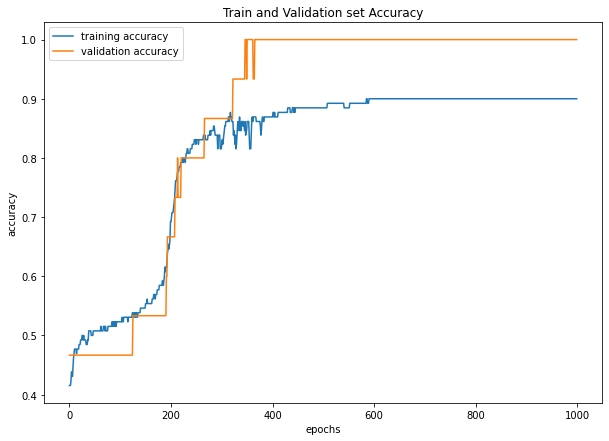

In [10]:
# plotting result on trainig and validation accuracies:
plt.figure(figsize=(10, 7))
plt.title("Train and Validation set Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(result_of_training.history['accuracy'])
plt.plot(result_of_training.history['val_accuracy'])
plt.legend(["training accuracy", "validation accuracy"])

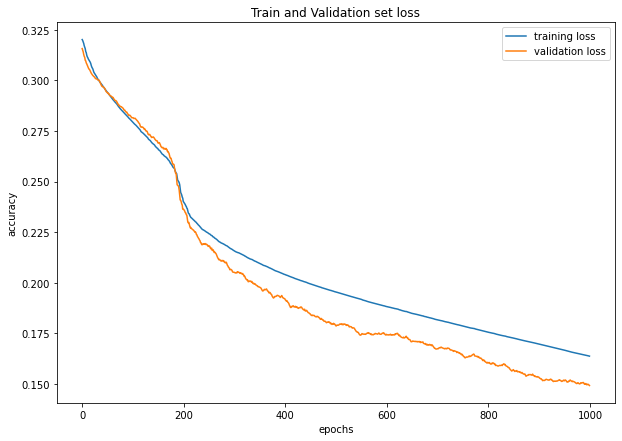

In [12]:
# plotting result on training and validation losses:
plt.figure(figsize=(10, 7))
plt.title("Train and Validation set loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(result_of_training.history['loss'])
plt.plot(result_of_training.history['val_loss'])
plt.legend(["training loss", "validation loss"])

In [13]:
# test our model with new data point:
test_01 = [[5, 6, 30]]     # label=0
prediction = np.argmax(mlp_model.predict(test_01), axis=1)
print("the class of this entry is: ", prediction)

the class of this entry is:  [0]


# The End